In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datalatih = pd.read_excel("datatest.xlsx")
datalatih.head(11)

,nama,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,Matematika,97,96,95,1,2
1,Matematika,85,79,72,2,1
2,Sastra Inggris,70,80,85,1,2
3,Matematika,81,83,80,1,1
4,Sastra Inggris,97,76,82,2,2
5,Matematika,90,85,82,1,2
6,Sastra Indonesia,87,83,93,2,1
7,Sastra Indonesia,84,81,89,2,1
8,Sastra Inggris,80,89,84,1,2
9,Sastra Inggris,86,87,83,1,2


In [2]:
datalatih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nama              11 non-null     object
 1   Matematika        11 non-null     int64 
 2   Bahasa Inggris    11 non-null     int64 
 3   Bahasa Indonesia  11 non-null     int64 
 4   Prestasi Siswa    11 non-null     int64 
 5   Prestasi Sekolah  11 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 656.0+ bytes


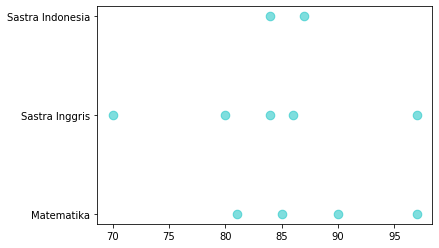

In [5]:
from sklearn.cluster import KMeans
plt.scatter(datalatih.Matematika, datalatih.nama, s = 75, c = "c", marker = "o", alpha = 0.5)
plt.show()

In [6]:
x = datalatih.drop(["nama"], axis=1)
x.head(11)

,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,97,96,95,1,2
1,85,79,72,2,1
2,70,80,85,1,2
3,81,83,80,1,1
4,97,76,82,2,2
5,90,85,82,1,2
6,87,83,93,2,1
7,84,81,89,2,1
8,80,89,84,1,2
9,86,87,83,1,2


In [7]:
y = datalatih["nama"]
y.head(11)

0           Matematika
1           Matematika
2       Sastra Inggris
3           Matematika
4       Sastra Inggris
5           Matematika
6     Sastra Indonesia
7     Sastra Indonesia
8       Sastra Inggris
9       Sastra Inggris
10      Sastra Inggris
Name: nama, dtype: object

In [8]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

modelnb = GaussianNB()

nbtrain = modelnb.fit(x, y)
datauji = pd.read_excel("datatest.xlsx")
datauji.head(11)

,nama,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,Matematika,97,96,95,1,2
1,Matematika,85,79,72,2,1
2,Sastra Inggris,70,80,85,1,2
3,Matematika,81,83,80,1,1
4,Sastra Inggris,97,76,82,2,2
5,Matematika,90,85,82,1,2
6,Sastra Indonesia,87,83,93,2,1
7,Sastra Indonesia,84,81,89,2,1
8,Sastra Inggris,80,89,84,1,2
9,Sastra Inggris,86,87,83,1,2


In [9]:
x_test = datauji.drop(["nama"], axis=1)
x_test.head(11)

,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,97,96,95,1,2
1,85,79,72,2,1
2,70,80,85,1,2
3,81,83,80,1,1
4,97,76,82,2,2
5,90,85,82,1,2
6,87,83,93,2,1
7,84,81,89,2,1
8,80,89,84,1,2
9,86,87,83,1,2


In [10]:
y_uji = datauji["nama"]
y_uji.head(11)

0           Matematika
1           Matematika
2       Sastra Inggris
3           Matematika
4       Sastra Inggris
5           Matematika
6     Sastra Indonesia
7     Sastra Indonesia
8       Sastra Inggris
9       Sastra Inggris
10      Sastra Inggris
Name: nama, dtype: object

In [11]:
Y_predict = nbtrain.predict(x_test)
print("Prediksi Naive Bayes : ",Y_predict)

Prediksi Naive Bayes :  ['Matematika' 'Matematika' 'Sastra Inggris' 'Matematika' 'Sastra Inggris'
 'Sastra Inggris' 'Sastra Indonesia' 'Sastra Indonesia' 'Sastra Inggris'
 'Sastra Inggris' 'Sastra Indonesia']


In [12]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_uji, Y_predict)
print("Akurasi Naive Bayes : ",accuracy)

Akurasi Naive Bayes :  0.8181818181818182


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_uji, Y_predict))

                  precision    recall  f1-score   support

      Matematika       1.00      0.75      0.86         4
Sastra Indonesia       0.67      1.00      0.80         2
  Sastra Inggris       0.80      0.80      0.80         5

        accuracy                           0.82        11
       macro avg       0.82      0.85      0.82        11
    weighted avg       0.85      0.82      0.82        11

